# CAPSTONE PROJECT - CLUSTERING MEXICO'S TOP 100 CITIES BY DEPRESSION RISK FACTORS
______________________________________________________________________________________________________________________________________________

### IMPORT LIBRARIES

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import types
from botocore.client import Config
import ibm_boto3
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.3                |   py36h921218d_0        18.1 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    num

## RETRIEVE AND CLEAN DATA
#### Data comes from 4 sources
 (INEGI) Mexico's National Institute of Statistics and Geography - Microdata-CSV Tables
 
 (INEGI) Mexico's National Institute of Statistics and Geography  - General Data - Mexican States - API Query
 
 (INEGI) Mexico's National Institute of Statistics and Geography  - General Data - Mexican Municipalities - API Query
 
 Foursquare - General Data - API Query/

### STEP 1 - INEGI - CSV TABLES DATA RETRIEVE AND CLEAN
#### The following tables were queried directly from INEGI Website and were stored in IBM Watson Study as assets

##### We will import first a table with the 116 most populated municipalities in Mexico. Then we will drop some columns and add the Features Column. In this case, every feature is a Risk Factor that increases the chances to trigger depression on any individual

In [2]:
import types
import pandas as pd

df_municipality = pd.read_csv('Most Populated Municipalities.csv')
df_municipality.head()


,State Index,State,Municipality Index,Municipality
0,1,Aguascalientes,1001,Aguascalientes
1,2,Baja California,2001,Ensenada
2,2,Baja California,2002,Mexicali
3,2,Baja California,2004,Tijuana
4,3,Baja California Sur,3003,La Paz


#### Now we will begin adding features from all of the other tables

In [3]:
import types
import pandas as pd

df_population_state = pd.read_csv("Total Population by State.csv")


df_SF_No_Access_Water = pd.read_csv('Total population with access to water.csv')


df_G_New_Cases_Depression= pd.read_csv('New Mental Disorders Registered.csv')


df_G_Depression = pd.read_csv('Percentage of Population who has felt depression.csv')


df_SE_Migrating_Out = pd.read_csv('People migrating in and out of the region.csv')


df_SF_No_Social_Security = pd.read_csv('Percentage of people non affiliated to social security.csv')


df_SF_Housing_Overcrowding = pd.read_csv('Total 6 people or more sharing housing.csv')


df_SI_Mortality_Breast_Cancer = pd.read_csv('Population mortality by breast cancer.csv')


df_SI_Mortality_Prostate_Cancer = pd.read_csv('Population mortaility by prostate cancer.csv')


df_SI_Mortality_Diabetes = pd.read_csv('Population mortality by diabetes.csv')

print('All CSV Columns loaded successfully')

All CSV Columns loaded successfully


#### Merge all columns and then drop unnecesary columns to our purpose


In [4]:
#Merge Columns, they all have State Index and State in Common
df_risk_factors_1 = df_population_state.copy() 
dataframes= [df_G_New_Cases_Depression,df_SF_No_Access_Water,df_G_Depression,df_SE_Migrating_Out,df_SF_No_Social_Security,
             df_SI_Mortality_Breast_Cancer,df_SI_Mortality_Prostate_Cancer,df_SI_Mortality_Diabetes]
for dataframe in dataframes:

    df_risk_factors_1 =pd.merge(df_risk_factors_1,dataframe, on=['State Index'])
df_risk_factors_1= df_risk_factors_1.drop(['State_y','State_x'],axis=1)    
df_risk_factors_1.head()

,State Index,Total Population,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),Total_x,People with access inside home,Percentage of population who has felt depressed,Migrating out,Migrating in,Total_y,Afiliated,Non Afiliated,Non Specified,2016,Total Mortality by Prostate Cancer,State,Total Population mortality by diabetes
0,1,1316032,"107,32","1,58",1300635,1220535,"20,2",233073,136354,100,"86,9","12,9","0,2",71,69,Aguascalientes,801
1,2,3348898,"144,81","5,11",3204661,3000950,"21,2",1299773,185457,100,"81,6","18,1","0,3",192,164,Baja California,2427
2,3,718384,"112,67","2,2",658138,557229,"21,2",246685,33074,100,"85,9","13,6","0,5",34,36,Baja California Sur,377
3,4,902250,"139,15","1,03",840907,534468,"31,3",180252,109734,100,"87,8","11,9","0,2",35,28,Campeche,723
4,5,2961708,"31,23","0,57",2901261,2633210,"45,6",362707,434617,100,"85,4","14,1","0,5",222,136,Coahuila de Zaragoza,2744


In [5]:
#Drop Unnecessary columns
df_risk_factors_1= df_risk_factors_1.drop(['Total_y','Afiliated','Non Specified','Total_x'],axis=1)
df_risk_factors_1.head()

,State Index,Total Population,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with access inside home,Percentage of population who has felt depressed,Migrating out,Migrating in,Non Afiliated,2016,Total Mortality by Prostate Cancer,State,Total Population mortality by diabetes
0,1,1316032,"107,32","1,58",1220535,"20,2",233073,136354,"12,9",71,69,Aguascalientes,801
1,2,3348898,"144,81","5,11",3000950,"21,2",1299773,185457,"18,1",192,164,Baja California,2427
2,3,718384,"112,67","2,2",557229,"21,2",246685,33074,"13,6",34,36,Baja California Sur,377
3,4,902250,"139,15","1,03",534468,"31,3",180252,109734,"11,9",35,28,Campeche,723
4,5,2961708,"31,23","0,57",2633210,"45,6",362707,434617,"14,1",222,136,Coahuila de Zaragoza,2744


#### Rename columns to make their title clear

In [6]:
#Rename Columns to make their title clear
df_risk_factors_1 = df_risk_factors_1.rename(columns={"Total Population": "Total Population in the State", 
                                                      "People with access inside home": "People with Water access at home",
                                                      "Migrating out": "People migrating out of the State",
                                                      "Migrating in": "People migrating inside the State",
                                                      "Non Afiliated": "People without social security",
                                                      "2016": "Total Mortality by breast cancer"})
df_risk_factors_1.head(1)

,State Index,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,State,Total Population mortality by diabetes
0,1,1316032,"107,32","1,58",1220535,"20,2",233073,136354,"12,9",71,69,Aguascalientes,801


In [7]:
#From the columns, New Depression CAses, New Anorexia & Bulimia Cases, Percentage of population who has felt depressed, and people without social security
#are object type, which is not wrong, but it will be better to have them as int64 for further data manipulation
#To change types will have first to change commas by points for decimals

df_risk_factors_1["New Depression Cases (No per 100 thousand inhabitants)"]= [x.replace(',', '.') for x in df_risk_factors_1["New Depression Cases (No per 100 thousand inhabitants)"]]
df_risk_factors_1["New Depression Cases (No per 100 thousand inhabitants)"] = df_risk_factors_1["New Depression Cases (No per 100 thousand inhabitants)"].astype(float)

df_risk_factors_1["New Anorexia & Bulimia Cases (No per 100 thousand inhabitants)"]= [x.replace(',', '.') for x in df_risk_factors_1["New Anorexia & Bulimia Cases (No per 100 thousand inhabitants)"]]
df_risk_factors_1["New Anorexia & Bulimia Cases (No per 100 thousand inhabitants)"] = df_risk_factors_1["New Anorexia & Bulimia Cases (No per 100 thousand inhabitants)"].astype(float)

df_risk_factors_1["Percentage of population who has felt depressed"]= [x.replace(',', '.') for x in df_risk_factors_1["Percentage of population who has felt depressed"]]
df_risk_factors_1["Percentage of population who has felt depressed"] = df_risk_factors_1["Percentage of population who has felt depressed"].astype(float)

df_risk_factors_1["People without social security"]= [x.replace(',', '.') for x in df_risk_factors_1["People without social security"]]
df_risk_factors_1["People without social security"] = df_risk_factors_1["People without social security"].astype(float)

df_risk_factors_1.head()

,State Index,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,State,Total Population mortality by diabetes
0,1,1316032,107.32,1.58,1220535,20.2,233073,136354,12.9,71,69,Aguascalientes,801
1,2,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,Baja California,2427
2,3,718384,112.67,2.20,557229,21.2,246685,33074,13.6,34,36,Baja California Sur,377
3,4,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,Campeche,723
4,5,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,Coahuila de Zaragoza,2744


### STEP 2 - INEGI -MEXICAN STATES - API QUERY DATA RETRIEVE AND CLEAN
#### The following tables were queried using INEGI's Website API.

##### We have previously selected codes from INEGI's Website, each state, municipality and feature have a proper code. We will use combinations of these codessuch as State-Feature or Municipality-Feature to perform the queries. Since the API gives only a single value per query, we're gonna have to automate the URL Query process to continue filling the Dataframe containing States, Municipalities and Features. In this case, every feature is a Risk Factor that increases the chances to trigger depression on any individual

#### API Query

In [8]:
!conda install furl --y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - furl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    orderedmultidict-1.0.1     |           py36_0          21 KB
    certifi-2019.11.28         |           py36_0         156 KB
    furl-2.1.0                 |             py_0          23 KB
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

    furl:             2.1.0-py_0                   
    orderedmultidict: 1.0.1-py36_0    

#### Create a list with the Feature, Municipality, State codes as stated by INEGI API so we can query the values and append them to a dataframe

In [9]:
#First we need to create a list with INEGI's Codes for each feature we want to append to the dataframe described before. 
#Since there were thousands of characteristics describing Mexico's population, we only chose 30 Features (Population's characteristics) related as risk
#factors for depression.Feature's name and its respected code were manually tabulated in excel and imported to the Notebook.


df_api_features_M = pd.read_csv('API Features-Municipality.csv')

df_api_features_S = pd.read_csv('API Features-State.csv')
df_api_features_S.head()


,Feature Name,Index Reference
0,People admitted for breach of trust to state p...,6200001464
1,People admitted sexual abuse to state prisons,6200001465
2,People declared being Discriminated,6200105772
3,Number of Workplace Conflicts legally registered,1007000012
4,Persons admitted for breach of obligations of ...,6200032446


In [10]:
#Then we will have to create a dataframe with INEGI's INDEX for each municipality and state, 
#We can retrieve this information from the first dataframe imported to this notebook called df_municipality

municipality_index= df_municipality['Municipality Index']
state_index= df_population_state['State Index']

#Now we can begin the URL API query

#### For Loop to fill the dataframes using the Feature and State Index

##### INEGI's API has a limit of 10 features and 1 State per query. So It will be needed to do a loop to query the info of all 32 States. Since the value to change in the URL is in the middle of the URL,"https://www.inegi.org.mx/value/value/value/VARIABLE1/value/value/VARIABLE2?=json" It was used a package known as "FURL" that allowed to separate in segments the URL query making it possible to make the For Loop. Moreover, some of INEGI's Index began by "0" like "01", which python transformed in "1" and insert it that way into the URL, giving a "Not Found 500" error, so it was needed to add a "zfill()" command to add those "0". Finally, while doing the For Loop, it was seen that some of the queries returned dictionaries with had a "None Type", so an IF ELIF Statement were used to set a ("0") when that happened

In [12]:
import requests
import json
from furl import furl
Observaciones=[]
features_index_S='6200001464,6200001465,6200105772,1007000012,6200032446,6200001478,6200032468,6200001504,6200240338,6200044674,6300000085'
df_risk_factors_2=df_api_features_S
f = furl('https://www.inegi.org.mx')
for state in state_index:
    if state < 10:
        state = str(state).zfill(2)
    Observaciones=[]
    Indicadores=[]
    f.path.segments = ['app','api','indicadores','desarrolladores','jsonxml','INDICATOR',features_index_S, 'es',state, 'true','BISE','2.0','1af978ce-b23a-f433-5f4e-0286c9a08144']
    f.args['type'] = 'json'
    f.url
    response= requests.get(f.url)
    if response.status_code==200:
        content= json.loads(response.content)
        Series=content['Series'][0]['OBSERVATIONS']
        Series1=content['Series'][1]['OBSERVATIONS']
        Series2=content['Series'][2]['OBSERVATIONS']
        Series3=content['Series'][3]['OBSERVATIONS']
        Series4=content['Series'][4]['OBSERVATIONS']
        Series5=content['Series'][5]['OBSERVATIONS']
        Series6=content['Series'][6]['OBSERVATIONS']
        Series7=content['Series'][7]['OBSERVATIONS']
        Series8=content['Series'][8]['OBSERVATIONS']
        Series9=content['Series'][9]['OBSERVATIONS']
        Series10=content['Series'][10]['OBSERVATIONS']
        for obs in Series:  
            Indicadores.append(content['Series'][0]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series1:  
            Indicadores.append(content['Series'][1]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series2:  
            Indicadores.append(content['Series'][2]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series3:  
            Indicadores.append(content['Series'][3]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series4:  
            Indicadores.append(content['Series'][4]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series5:  
            Indicadores.append(content['Series'][5]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series6:  
            Indicadores.append(content['Series'][6]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series7:  
            Indicadores.append(content['Series'][7]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series8:  
            Indicadores.append(content['Series'][8]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series9:  
            Indicadores.append(content['Series'][9]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series10:  
            Indicadores.append(content['Series'][10]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0);   
        df_Indicadores=pd.DataFrame(Indicadores)
        df_Indicadores=df_Indicadores.rename(columns= {0: "Index Reference"})
        df_Observaciones=pd.DataFrame(Observaciones)
        df_Observaciones=df_Observaciones.rename(columns= {0: str(state)})
        df_runner=pd.concat([df_Indicadores,df_Observaciones],axis=1)
        df_risk_factors_2=pd.merge(df_risk_factors_2.astype(str),df_runner.astype(str), on=['Index Reference'])
df_risk_factors_2



,Feature Name,Index Reference,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,People admitted for breach of trust to state p...,6200001464,19.0,51.0,7.0,5.0,33.0,11.0,31.0,15.0,0.0,5.0,85.0,42.0,30.0,18.0,25.0,6.0,2.0,52.0,13.0,6.0,13.0,24.0,5.0,23.0,64.0,227.0,1.0,14.0,19.0,35.0,15.0,26.0
1,People admitted sexual abuse to state prisons,6200001465,5.0,180.0,7.0,19.0,15.0,27.0,67.0,630.0,199.0,23.0,72.0,73.0,66.0,0.0,150.0,48.0,89.0,0.0,0.0,89.0,0.0,7.0,82.0,99.0,36.0,0.0,5.0,0.0,10.0,29.0,20.0,10.0
2,People declared being Discriminated,6200105772,9.0,203.0,2.0,8.0,14.0,88.0,72.0,221.0,145.0,8.0,22.0,64.0,247.0,0.0,381.0,41.0,6.0,7.0,11.0,105.0,153.0,102.0,250.0,65.0,13.0,0.0,125.0,128.0,99.0,218.0,0.0,0.0
3,Number of Workplace Conflicts legally registered,1007000012,3050.0,8704.0,1648.0,1465.0,10707.0,939.0,2654.0,11008.0,33842.0,2292.0,16461.0,5211.0,1878.0,22415.0,13959.0,5304.0,4022.0,1512.0,18250.0,1914.0,4629.0,8445.0,4514.0,4194.0,5195.0,10711.0,6176.0,5169.0,645.0,5582.0,4329.0,1076.0
4,Persons admitted for breach of obligations of ...,6200032446,34.0,460.0,103.0,77.0,17.0,87.0,781.0,56.0,36.0,5.0,94.0,650.0,409.0,0.0,88.0,25.0,24.0,0.0,21.0,5.0,0.0,197.0,121.0,72.0,167.0,1277.0,530.0,146.0,128.0,330.0,225.0,27.0
5,People admitted for other crimes against the f...,6200001478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,164.0,13.0,0.0,0.0,3.0,4.0,3.0,312.0,1.0,0.0,0.0,0.0,55.0,2.0,4.0
6,People admitted gender-based violence in all i...,6200032468,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0
7,Persons admitted for family violence to state ...,6200001504,21.0,258.0,79.0,16.0,102.0,98.0,62.0,911.0,681.0,161.0,395.0,410.0,179.0,248.0,15.0,48.0,65.0,48.0,121.0,184.0,161.0,113.0,120.0,86.0,236.0,814.0,165.0,27.0,0.0,394.0,17.0,17.0
8,Number of Deaths by suicide,6200240338,140.0,194.0,57.0,69.0,216.0,51.0,147.0,365.0,227.0,122.0,504.0,63.0,109.0,630.0,584.0,245.0,88.0,66.0,317.0,140.0,319.0,138.0,125.0,204.0,135.0,267.0,142.0,164.0,55.0,253.0,235.0,99.0
9,Deaths of mothers giving birth (Rate for 100 0...,6300000085,20.7,41.4,8.4,35.5,38.4,7.9,73.7,52.0,30.2,30.7,34.4,73.2,38.5,30.6,36.0,34.5,25.4,44.5,27.0,54.5,28.7,19.4,32.2,35.4,15.7,37.8,37.6,43.4,33.5,39.2,14.1,30.0


#### Now we have to merge the new table with the DataFrame from STEP 1

##### For this purpose we will have to transpose the DataFrame and join them on State Index

In [13]:
df_risk_factors_2_T = df_risk_factors_2.copy()


In [14]:
#drop the column Index Reference and transpose the entire DataFrame, 
df_risk_factors_2_T.drop('Index Reference',axis=1,inplace=True)
df_risk_factors_2_T= df_risk_factors_2_T.transpose()
#then set the first row as column headers and drop the row
df_risk_factors_2_T.columns = df_risk_factors_2_T.iloc[0]
df_risk_factors_2_T.drop(df_risk_factors_2_T.index[0],inplace=True)
df_risk_factors_2_T.head()


Feature Name,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns)
01,19.0,5.0,9.0,3050.0,34.0,0.0,0.0,21.0,140.0,20.7
02,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
03,7.0,7.0,2.0,1648.0,103.0,0.0,0.0,79.0,57.0,8.4
04,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5
05,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4


#### In order to merge this dataframe with the one in STEP 1, we are going to have to add another column as an index and change "Feature Name" to the real value of this column which is "State Index", then we will merge the columns on "State Index" of both dataframes.

In [15]:
#Add another column and alocate it as index column

df_risk_factors_2_T = df_risk_factors_2_T.reset_index()

#Rename the feature name column as "State Index"
df_risk_factors_2_T = df_risk_factors_2_T.rename(columns={"index":"State Index"})
#Change columns to float type, unless the "State Index"
df_risk_factors_2_T=df_risk_factors_2_T.astype(float)
df_risk_factors_2_T['State Index'] = df_risk_factors_2_T['State Index'].astype("int64")
#Drop the newly created column to set as index
df_risk_factors_2_T.head()

Feature Name,State Index,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns)
0,1,19.0,5.0,9.0,3050.0,34.0,0.0,0.0,21.0,140.0,20.7
1,2,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
2,3,7.0,7.0,2.0,1648.0,103.0,0.0,0.0,79.0,57.0,8.4
3,4,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5
4,5,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4


#### Now we are capable of merging both DataFrames

In [16]:
df_risk_factors_3 = pd.merge(df_risk_factors_1,df_risk_factors_2_T, on=['State Index'])
df_risk_factors_3


,State Index,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,State,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns)
0,1,1316032,107.32,1.58,1220535,20.2,233073,136354,12.9,71,69,Aguascalientes,801,19.0,5.0,9.0,3050.0,34.0,0.0,0.0,21.0,140.0,20.7
1,2,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,Baja California,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
2,3,718384,112.67,2.20,557229,21.2,246685,33074,13.6,34,36,Baja California Sur,377,7.0,7.0,2.0,1648.0,103.0,0.0,0.0,79.0,57.0,8.4
3,4,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,Campeche,723,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5
4,5,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,Coahuila de Zaragoza,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4
5,6,715095,196.23,2.10,638923,30.1,182943,93157,12.1,50,38,Colima,572,11.0,27.0,88.0,939.0,87.0,1.0,0.0,98.0,51.0,7.9
6,7,5228711,29.26,1.02,2446134,26.6,140135,491919,17.3,177,269,Chiapas,3819,31.0,67.0,72.0,2654.0,781.0,0.0,6.0,62.0,147.0,73.7
7,8,3569479,295.76,5.74,3157530,22.9,521469,243052,11.2,285,238,Chihuahua,2708,15.0,630.0,221.0,11008.0,56.0,0.0,0.0,911.0,365.0,52.0
8,9,8985339,204.59,1.60,7889123,35.1,1679045,5207907,20.8,766,634,Ciudad de México,9937,0.0,199.0,145.0,33842.0,36.0,15.0,0.0,681.0,227.0,30.2
9,10,1759848,242.75,1.20,1320174,41.8,189923,461229,16.1,103,122,Durango,1232,5.0,23.0,8.0,2292.0,5.0,0.0,1.0,161.0,122.0,30.7


### STEP 3 - INEGI -MEXICAN MUNICIPALITIES - API QUERY DATA RETRIEVE AND CLEAN
#### The following tables were queried using INEGI's Website API.

In [17]:
#Then we will have to create a dataframe with INEGI's INDEX for each municipality and state, 
#We can retrieve this information from the first dataframe imported to this notebook called df_municipality
import requests
import json
municipality_index= df_municipality['Municipality Index'].copy()
municipality_index.head()
#Now we can begin the URL API query

0    1001
1    2001
2    2002
3    2004
4    3003
Name: Municipality Index, dtype: int64

In [18]:
import requests
import json
from furl import furl
Observaciones=[]
features_index_M='1002000030,1002000039,6207019060,6207019037,6207019029,6207019069,6207019042'
df_risk_factors_4=df_api_features_M.copy()
f = furl('https://www.inegi.org.mx')
for municipality in municipality_index:
    if municipality < 10000:
        municipality = str(municipality).zfill(5)
    Observaciones=[]
    Indicadores=[]
    f.path.segments = ['app','api','indicadores','desarrolladores','jsonxml','INDICATOR',features_index_M, 'es',municipality, 'true','BISE','2.0','d806d72d-d8f7-7337-ecc6-6c4c32940619']
    f.args['type'] = 'json'
    f.url
    response= requests.get(f.url)
    if response.status_code==200:
        content= json.loads(response.content)
        Series=content['Series'][0]['OBSERVATIONS']
        Series1=content['Series'][1]['OBSERVATIONS']
        Series2=content['Series'][2]['OBSERVATIONS']
        Series3=content['Series'][3]['OBSERVATIONS']
        Series4=content['Series'][4]['OBSERVATIONS']
        Series5=content['Series'][5]['OBSERVATIONS']
        Series6=content['Series'][6]['OBSERVATIONS']
        for obs in Series:  
            Indicadores.append(content['Series'][0]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series1:  
            Indicadores.append(content['Series'][1]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series2:  
            Indicadores.append(content['Series'][2]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series3:  
            Indicadores.append(content['Series'][3]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series4:  
            Indicadores.append(content['Series'][4]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series5:  
            Indicadores.append(content['Series'][5]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0)
        for obs in Series6:  
            Indicadores.append(content['Series'][6]['INDICADOR'])
            if str(obs['OBS_VALUE'])!='None':
                Observaciones.append(float(obs['OBS_VALUE']))
            elif str(obs['OBS_VALUE'])=='None':
                Observaciones.append(0);   
        df_Indicadores2=pd.DataFrame(Indicadores)
        df_Indicadores2=df_Indicadores2.rename(columns= {0: "Index Reference"})
        df_Observaciones2=pd.DataFrame(Observaciones)
        df_Observaciones2=df_Observaciones2.rename(columns= {0: str(municipality)})
        df_runner2=pd.concat([df_Indicadores2,df_Observaciones2],axis=1)
        df_risk_factors_4=pd.merge(df_risk_factors_4.astype(str),df_runner2.astype(str), on=['Index Reference'])
        df_risk_factors_4.drop(df_risk_factors_4.index[7],inplace=True)
    print(municipality)
df_risk_factors_4


01001
02001
02002
02004
03003
04002
04003
05002
05018
05025
05030
05035
06002
06007
06010
07078
07089
07097
07101
08019
08021
08037
09002
09003
09004
09005
09006
09007
09008
09009
09010
09011
09012
09013
09014
09015
09016
09017
10005
10007
11007
11017
11020
11027
12001
12029
12035
13048
14039
14067
14098
14120
15013
15020
15025
15029
15031
15039
15057
15058
15060
15081
15104
15106
15109
15121
16053
16102
16108
17006
17007
17011
18017
19006
19019
19021
19026
19031
19039
19046
19048
20067
21114
21156
22014
22016
23004
23005
23008
24013
24028
24035
25001
25006
25012
26018
26030
26043
26055
27004
28009
28022
28027
28032
28038
28041
30039
30044
30087
30118
30131
30193
31050
32010
32017
32056


,Feature Name,Index Reference,01001,02001,02002,02004,03003,04002,04003,05002,05018,05025,05030,05035,06002,06007,06010,07078,07089,07097,07101,08019,08021,08037,09002,09003,09004,09005,09006,09007,09008,09009,09010,09011,09012,09013,09014,09015,09016,09017,10005,10007,11007,11017,11020,11027,12001,12029,12035,13048,14039,14067,14098,14120,15013,15020,15025,15029,15031,15039,15057,15058,15060,15081,15104,15106,15109,15121,16053,16102,16108,17006,17007,17011,18017,19006,19019,19021,19026,19031,19039,19046,19048,20067,21114,21156,22014,22016,23004,23005,23008,24013,24028,24035,25001,25006,25012,26018,26030,26043,26055,27004,28009,28022,28027,28032,28038,28041,30039,30044,30087,30118,30131,30193,31050,32010,32017,32056
0,Number of Deaths by Natural Cause,1002000030,4250.0,3125.0,5923.0,10235.0,1556.0,1578.0,1233.0,655.0,1456.0,969.0,4170.0,3999.0,1031.0,1137.0,594.0,972.0,2264.0,560.0,3198.0,5923.0,989.0,8831.0,3583.0,4445.0,982.0,9664.0,3269.0,11576.0,1527.0,723.0,4899.0,1912.0,3874.0,2563.0,3145.0,4286.0,2925.0,3682.0,3315.0,1846.0,3103.0,3555.0,8055.0,2052.0,5008.0,1214.0,1004.0,1581.0,11462.0,1365.0,3441.0,6610.0,2593.0,1410.0,1761.0,794.0,3084.0,1986.0,5256.0,7549.0,1982.0,1846.0,4655.0,4468.0,2448.0,2681.0,3949.0,1893.0,1404.0,1208.0,2860.0,1125.0,2181.0,2011.0,725.0,1504.0,3989.0,1033.0,8338.0,2961.0,1395.0,1795.0,10038.0,1557.0,4736.0,1339.0,1234.0,3371.0,846.0,1113.0,4743.0,1296.0,2378.0,4765.0,2599.0,2867.0,4834.0,1114.0,1182.0,3883.0,1219.0,2432.0,2102.0,3562.0,1915.0,2090.0,2060.0,1485.0,2944.0,1054.0,1526.0,3907.0,5581.0,1407.0,770.0,851.0
1,Number of Divorces,1002000039,2767.0,1043.0,738.0,1978.0,390.0,880.0,760.0,457.0,1069.0,675.0,1576.0,1618.0,634.0,300.0,31.0,165.0,284.0,193.0,761.0,2977.0,742.0,3982.0,142.0,333.0,74.0,349.0,113.0,232.0,59.0,18.0,187.0,82.0,194.0,103.0,466.0,9904.0,301.0,163.0,431.0,877.0,1082.0,632.0,3043.0,209.0,1285.0,493.0,393.0,722.0,320.0,281.0,63.0,2171.0,814.0,489.0,255.0,14.0,204.0,489.0,983.0,1419.0,522.0,555.0,1066.0,1939.0,21.0,1109.0,1366.0,472.0,469.0,113.0,485.0,302.0,677.0,6.0,750.0,4.0,2440.0,5.0,8617.0,1098.0,5.0,541.0,2286.0,330.0,2112.0,487.0,710.0,1452.0,505.0,426.0,3123.0,0.0,1565.0,1955.0,1522.0,1076.0,1688.0,482.0,428.0,637.0,2.0,904.0,1077.0,1355.0,29.0,837.0,118.0,339.0,639.0,123.0,55.0,298.0,1343.0,357.0,0.0,716.0
2,Percentage of Retired Employees,6207019060,9.3007555,9.6406691,11.387984,6.1939867,13.180345,11.070865,5.3703664,7.4749686,12.739589,9.4632111,9.8261792,11.328429,13.428508,6.9107015,9.816558,4.8982251,6.4820521,2.8907563,6.0186464,14.116623,13.397078,8.239038,18.121612,17.191963,6.7617759,14.879568,15.178686,9.5019089,10.381088,4.6755874,12.149012,7.027179,12.824421,11.170708,25.199022,17.119407,17.343523,16.487704,9.7395431,9.0078107,5.4479251,6.5353453,6.1358758,7.5854423,7.256448,5.1225797,7.1528421,8.9055657,12.135503,6.5507395,6.5024877,8.3225632,9.5052542,11.701365,3.8600155,4.3636816,3.2590038,5.4516406,10.129815,8.7107399,6.3033791,4.1342619,13.608622,6.1231506,7.6829414,10.995666,7.5842044,5.6040392,5.2174043,8.2177239,13.345704,8.0523196,11.270534,5.2295887,12.847287,5.0690129,12.712633,3.2554431,14.529182,16.811072,8.8379948,10.628697,9.5005139,4.4953778,8.8162428,6.1556562,8.3410849,3.8832332,2.5718116,8.8734292,10.257094,7.2604578,9.8132454,9.2960423,12.297013,12.409529,9.905335,6.7555591,7.4218863,6.1901427,14.551816,8.4974571,6.6376053,5.7254199,13.668665,10.373339,7.859686,7.8004634,9.2012479,18.060573,10.876391,11.284181,12.666116,3.2299742,6.6241766,10.174984
3,Percentage of homes lacking a proper roof,6207019037,0.0742536,0.3272418,1.0166712,0.451176,0.326825,0.4535176,0.1616677,1.2213329,0.0773454,1.6863781,0.0815852,0.229298,0.4742755,1.639811,0.2467086,0.3076803,0.1308886,0.4089204,0.3403846,0.220961,0.3989658,0.2425546,0.216108,0.3999291,1.7514746,0.3605721,0.2152237,0.9507127,2.2737499,6.6549192,0.5788314,1.6199812,2.289223,5.0315228,0.3034407,0.1390354,0.0594112,0.3701168,0.8948585,0.4836245,0.2685351,0.2806239,0.1724437,0.2858298,

### Now we will do the same data treatment as described in STEP 2

In [19]:
df_risk_factors_4_T = df_risk_factors_4.copy()

In [20]:
#drop the column Index Reference and transpose the entire DataFrame, 
df_risk_factors_4_T.drop('Index Reference',axis=1,inplace=True)
df_risk_factors_4_T= df_risk_factors_4_T.transpose()
#then set the first row as column headers and drop the row
df_risk_factors_4_T.columns = df_risk_factors_4_T.iloc[0]
df_risk_factors_4_T.drop(df_risk_factors_4_T.index[0],inplace=True)
df_risk_factors_4_T.head()

Feature Name,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access
01001,4250.0,2767.0,9.3007555,0.0742536,46.159389,0.5219308,42.075713
02001,3125.0,1043.0,9.6406691,0.3272418,45.226686,0.3154745,44.793172
02002,5923.0,738.0,11.387984,1.0166712,50.010614,1.2398377,48.970065
02004,10235.0,1978.0,6.1939867,0.451176,46.418189,2.0494379,51.287538
03003,1556.0,390.0,13.180345,0.326825,51.723325,0.3620162,50.719377


In [21]:
#Add another column and alocate it as index column

df_risk_factors_4_T = df_risk_factors_4_T.reset_index()

#Rename the feature name column as "State Index"
df_risk_factors_4_T = df_risk_factors_4_T.rename(columns={"index":"Municipality Index"})
#Change columns to float type, unless the "State Index"
df_risk_factors_4_T=df_risk_factors_4_T.astype(float)
df_risk_factors_4_T['Municipality Index'] = df_risk_factors_4_T['Municipality Index'].astype("int64")
#Drop the newly created column to set as index
df_risk_factors_4_T.head()

### Now we will merge all Dataframes on the municipality Index

Feature Name,Municipality Index,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access
0,1001,4250.0,2767.0,9.300755,0.074254,46.159389,0.521931,42.075713
1,2001,3125.0,1043.0,9.640669,0.327242,45.226686,0.315474,44.793172
2,2002,5923.0,738.0,11.387984,1.016671,50.010614,1.239838,48.970065
3,2004,10235.0,1978.0,6.193987,0.451176,46.418189,2.049438,51.287538
4,3003,1556.0,390.0,13.180345,0.326825,51.723325,0.362016,50.719377


In [22]:
#The municipality DataFrame will be the base of the new DataFrame
df_risk_factors_5=df_municipality.copy()

#Now we will add the risk_factors_4 (STEP 3) on Municipality Index
df_risk_factors_5=pd.merge(df_risk_factors_5,df_risk_factors_4_T, on=['Municipality Index'])


#Now we will add the risk_factors_3 (that includes Step 1 and 2) on State Index
df_risk_factors_5=pd.merge(df_risk_factors_5,df_risk_factors_3, on=['State Index'])
df_risk_factors_5=df_risk_factors_5.drop('State_y',axis=1)

df_risk_factors_5

,State Index,State_x,Municipality Index,Municipality,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns)
0,1,Aguascalientes,1001,Aguascalientes,4250.0,2767.0,9.300755,0.074254,46.159389,0.521931,42.075713,1316032,107.32,1.58,1220535,20.2,233073,136354,12.9,71,69,801,19.0,5.0,9.0,3050.0,34.0,0.0,0.0,21.0,140.0,20.7
1,2,Baja California,2001,Ensenada,3125.0,1043.0,9.640669,0.327242,45.226686,0.315474,44.793172,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
2,2,Baja California,2002,Mexicali,5923.0,738.0,11.387984,1.016671,50.010614,1.239838,48.970065,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
3,2,Baja California,2004,Tijuana,10235.0,1978.0,6.193987,0.451176,46.418189,2.049438,51.287538,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4
4,3,Baja California Sur,3003,La Paz,1556.0,390.0,13.180345,0.326825,51.723325,0.362016,50.719377,718384,112.67,2.20,557229,21.2,246685,33074,13.6,34,36,377,7.0,7.0,2.0,1648.0,103.0,0.0,0.0,79.0,57.0,8.4
5,4,Campeche,4002,Campeche,1578.0,880.0,11.070865,0.453518,53.386969,0.852205,41.895426,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,723,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5
6,4,Campeche,4003,Carmen,1233.0,760.0,5.370366,0.161668,45.872887,1.083025,41.372758,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,723,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5
7,5,Coahuila de Zaragoza,5002,Acuña,655.0,457.0,7.474969,1.221333,36.085067,1.242950,22.270358,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4
8,5,Coahuila de Zaragoza,5018,Monclova,1456.0,1069.0,12.739589,0.077345,46.621378,0.555813,44.256726,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4
9,5,Coahuila de Zaragoza,5025,Piedras Negras,969.0,675.0,9.463211,1.686378,35.557093,2.289649,39.434620,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4


### STEP 4 -  FOURSQUARE- General Data - API QUERY DATA RETRIEVE AND CLEAN
#### The following tables were queried using FOURSQUARE's API.

##### Some factors that trigger depression is substance abuse and lack of leisure activities to reduce stress. So it will be used the FOURSQUARE API To get for each municipality, the number of venues related to bars & liquor stores. Evidently, these establishments cannot be blamed for the amount and kind of substances their customers consume. However, we can compare these venues to the number of leisure & recreational related venues such as parks, gyms, spas. In this way, the idea is to have for each municipality, a ratio 
##### ratio=(Number of venues increasing depression risk:Number of venues lowering depression risk)
##### The hypothesis behind this ratio is that a municipality will have an increased risk of depression if it is easier to have access to alcohol (for example) than it is to have access to a park, gym, spa. Again, the main idea is to compare the different municipalities around this ratio, not to judge the use or misuse of these venues by their customers. 

#### Get the Geographical coordinates for each municipality

In [23]:
!pip install geopy

##### To this purpose it will be used the Geopy Geocoding Toolbox. It will also be used the dataframe df_municipalities which contains the name of all municipalities to create a For Loop to gather all coordinates.  

In [24]:
from geopy.geocoders import Nominatim
# Retrieve the Dataframe containing municipality name and Index and copy only those columns to a new dataframe
muni_geo = df_municipality[['State','Municipality']].copy()
muni_geo=muni_geo.values.tolist()
Latitude=[]
Longitude=[]
Municipality=[]
for state,municipality in muni_geo:
    query_editor=state+','+municipality
    geolocator = Nominatim(user_agent="Joss_Query")
    location = geolocator.geocode(query_editor)
    #stock the results in lists
    Latitude.append(float(location.latitude))
    Longitude.append(float(location.longitude))
    Municipality.append(str(municipality))
#Convert lists to dataframes
df_Latitude=pd.DataFrame(Latitude)
df_Latitude=df_Latitude.rename(columns= {0:"Latitude"})
df_Longitude=pd.DataFrame(Longitude)
df_Longitude=df_Longitude.rename(columns= {0:"Longitude"})
df_muni_geo=pd.DataFrame(Municipality)
df_muni_geo=df_muni_geo.rename(columns= {0:"Municipality"})
#Concatenate the Dataframes to the municipality name df
df_muni_geo=pd.concat([df_muni_geo,df_Latitude,df_Longitude],axis=1)
df_muni_geo.head(10)

,Municipality,Latitude,Longitude
0,Aguascalientes,21.880655,-102.296132
1,Ensenada,31.860742,-116.624825
2,Mexicali,32.624862,-115.448325
3,Tijuana,32.501019,-116.964663
4,La Paz,24.142284,-110.312616
5,Campeche,18.144965,-91.029497
6,Carmen,18.452520,-91.412974
7,Acuña,29.425095,-101.935372
8,Monclova,26.899999,-101.417117
9,Piedras Negras,28.701960,-100.521922


##### With this information it is possible to retrieve the information directly from Foursquare. Since it is possible to search by venue category, the following categories will be taken in account. 
##### Category A= Nightlife Spot-Number 4d4b7105d754a06376d81259 (Bar, Brasseur, Bar Lounge, Nightclub, Stripclub
##### Category B= Outdoors & Recreation-Number 4d4b7105d754a06377d81259 (Sports and track and field, swimming areas, bay, beaches, botanical gardens, bike paths, camping zones, parks, dog parks, fountains, gardens, farms, fields, fishing spots,hills, lakes, mountains, natural parks, play gardens, pools etc) 

In [25]:
#Initialize Foursquare credentials
CLIENT_ID = 'RQPT5NN2KKMHSKA5OGX0WZKSQV2IJGPZC0IBFAE3QWE5AJOV' # your Foursquare ID
CLIENT_SECRET = 'UQHXEKFKSOUNDXXWWTAWBI1MZNKDQQO1M5UG224BBBW0LPGY' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Your credentails:
CLIENT_ID: RQPT5NN2KKMHSKA5OGX0WZKSQV2IJGPZC0IBFAE3QWE5AJOV
CLIENT_SECRET:UQHXEKFKSOUNDXXWWTAWBI1MZNKDQQO1M5UG224BBBW0LPGY


In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


#### First we will get category A venues

In [27]:
import requests
import time

search_query = ['Bar','Beach Bar','Beer Bar','Beer Garden','Cocktail Bar','Dive Bar','Gay Bar','Hookah Bar','Hotel Bar','Karaoke Bar','Sports Bar','Pub','Lounge','Irish Pub','Whisky Bar','Wine Bar','Nightclub','Strip Club']
muni_geo_list=df_muni_geo.copy().values.tolist()
radius = 20000
category_A_list=[]
for m,latitude,longitude in muni_geo_list:
    data=[]
    for query in search_query:
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, query, radius, LIMIT)
        results = requests.get(url).json()
        #time.sleep(0.5)
        if len(results['response']['venues']) != 0:
            # assign relevant part of JSON to venues
            venues = results['response']['venues']
            # tranform venues into a dataframe
            dataframe = json_normalize(venues)
            # keep only columns that include venue name, and anything that is associated with location
            filtered_columns = ['categories'] 
            dataframe_filtered = dataframe.loc[:, filtered_columns]
            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
            # Count the number of venues related to Category A
            data.append(dataframe_filtered.loc[dataframe_filtered['categories']==query].count()[0])
    category_A_list.append(sum(data))
    print(m)
df_category_A=pd.DataFrame(category_A_list)
df_category_A=df_category_A.rename(columns= {0: 'Category_A_Venues'})
df_risk_factors_A=pd.concat([df_muni_geo,df_category_A],axis=1)    
df_risk_factors_A


Aguascalientes
Ensenada
Mexicali
Tijuana
La Paz
Campeche
Carmen
Acuña
Monclova
Piedras Negras
Saltillo
Torreón
Colima
Manzanillo
Villa de Álvarez
San Cristóbal de las Casas
Tapachula
Tonalá
Tuxtla Gutiérrez
Chihuahua
Delicias
Juárez
Azcapotzalco
Coyoacán
Cuajimalpa de Morelos
Gustavo A. Madero
Iztacalco
Iztapalapa
La Magdalena Contreras
Milpa Alta
Álvaro Obregón
Tláhuac
Tlalpan
Xochimilco
Benito Juárez
Cuauhtémoc
Miguel Hidalgo
Venustiano Carranza
Durango
Gómez Palacio
Celaya
Irapuato
León
Salamanca
Acapulco de Juárez
Chilpancingo de los Bravo
Iguala de la Independencia
Pachuca de Soto
Guadalajara
Puerto Vallarta
Tlaquepaque
Zapopan
Atizapán de Zaragoza
Coacalco de Berriozábal
Chalco
Chicoloapan
Chimalhuacán
Ixtapaluca
Naucalpan de Juárez
Nezahualcóyotl
Nicolás Romero
Tecámac
Tlalnepantla de Baz
Toluca
Tultitlán
Cuautitlán Izcalli
Morelia
Uruapan
Zamora
Cuautla
Cuernavaca
Jiutepec
Tepic
Apodaca
San Pedro Garza García
General Escobedo
Guadalupe
Juárez
Monterrey
San Nicolás de los Garza


,Municipality,Latitude,Longitude,Category_A_Venues
0,Aguascalientes,21.880655,-102.296132,53
1,Ensenada,31.860742,-116.624825,38
2,Mexicali,32.624862,-115.448325,42
3,Tijuana,32.501019,-116.964663,79
4,La Paz,24.142284,-110.312616,26
5,Campeche,18.144965,-91.029497,0
6,Carmen,18.452520,-91.412974,0
7,Acuña,29.425095,-101.935372,0
8,Monclova,26.899999,-101.417117,26
9,Piedras Negras,28.701960,-100.521922,23


#### Now we will get category B venues

In [28]:
import requests
import time

search_query = ['Baseball Field','Basketball Court','Bowling','Boxing Gym','Climbing Gym''Pool','Gymnastics Gym','Gym','Martial Arts Dojo','Pilates Studio','Track','Weight Loss Center','Yoga Studio','Skate Park','Soccer Field','Tennis Court','Volleyball Court','Bathing Area','Bay','Beach','Botanical Garden','Fishing Spot','Forest','Garden','Harbor','Hill','Lake','Mountain','National Park','Nature Preserve','Park','Pedestrian Plaza','Plaza','Recreation Center','River','Scenic Lookout','State Park']
muni_geo_list=df_muni_geo.copy().values.tolist()
radius = 20000
category_B_list=[]
for m,latitude,longitude in muni_geo_list:
    data=[]
    for query in search_query:
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, query, radius, LIMIT)
        results = requests.get(url).json()
        #time.sleep(0.5)
        if len(results['response']['venues']) != 0:
            # assign relevant part of JSON to venues
            venues = results['response']['venues']
            # tranform venues into a dataframe
            dataframe = json_normalize(venues)
            # keep only columns that include venue name, and anything that is associated with location
            filtered_columns = ['categories'] 
            dataframe_filtered = dataframe.loc[:, filtered_columns]
            # filter the category for each row
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
            # Count the number of venues related to Category A
            data.append(dataframe_filtered.loc[dataframe_filtered['categories']==query].count()[0])
    if sum(data) != 0:
        category_B_list.append(sum(data))
    elif sum(data) == 0:
        category_B_list.append(1)
    print(m)
df_category_B=pd.DataFrame(category_B_list)
df_category_B=df_category_B.rename(columns= {0: 'Category_B_Venues'})
df_risk_factors_B=pd.concat([df_risk_factors_A,df_category_B],axis=1)    
df_risk_factors_B

Aguascalientes
Ensenada
Mexicali
Tijuana
La Paz
Campeche
Carmen
Acuña
Monclova
Piedras Negras
Saltillo
Torreón
Colima
Manzanillo
Villa de Álvarez
San Cristóbal de las Casas
Tapachula
Tonalá
Tuxtla Gutiérrez
Chihuahua
Delicias
Juárez
Azcapotzalco
Coyoacán
Cuajimalpa de Morelos
Gustavo A. Madero
Iztacalco
Iztapalapa
La Magdalena Contreras
Milpa Alta
Álvaro Obregón
Tláhuac
Tlalpan
Xochimilco
Benito Juárez
Cuauhtémoc
Miguel Hidalgo
Venustiano Carranza
Durango
Gómez Palacio
Celaya
Irapuato
León
Salamanca
Acapulco de Juárez
Chilpancingo de los Bravo
Iguala de la Independencia
Pachuca de Soto
Guadalajara
Puerto Vallarta
Tlaquepaque
Zapopan
Atizapán de Zaragoza
Coacalco de Berriozábal
Chalco
Chicoloapan
Chimalhuacán
Ixtapaluca
Naucalpan de Juárez
Nezahualcóyotl
Nicolás Romero
Tecámac
Tlalnepantla de Baz
Toluca
Tultitlán
Cuautitlán Izcalli
Morelia
Uruapan
Zamora
Cuautla
Cuernavaca
Jiutepec
Tepic
Apodaca
San Pedro Garza García
General Escobedo
Guadalupe
Juárez
Monterrey
San Nicolás de los Garza


,Municipality,Latitude,Longitude,Category_A_Venues,Category_B_Venues
0,Aguascalientes,21.880655,-102.296132,53,60
1,Ensenada,31.860742,-116.624825,38,29
2,Mexicali,32.624862,-115.448325,42,75
3,Tijuana,32.501019,-116.964663,79,155
4,La Paz,24.142284,-110.312616,26,41
5,Campeche,18.144965,-91.029497,0,1
6,Carmen,18.452520,-91.412974,0,1
7,Acuña,29.425095,-101.935372,0,1
8,Monclova,26.899999,-101.417117,26,24
9,Piedras Negras,28.701960,-100.521922,23,30


#### Now that all information from both categories has been gathered, it possible to calculate the ratio

##### ratio=(Number of venues increasing depression risk:Number of venues lowering depression risk)

##### ratio = Category_A / Category_B



In [30]:
# Create a new column calculating the ratio 
df_risk_factors_ratio=pd.DataFrame(df_risk_factors_B['Category_A_Venues']/df_risk_factors_B['Category_B_Venues'])
df_risk_factors_ratio=df_risk_factors_ratio.rename(columns= {0: 'Number of Bars and Nightclubs per Number of Leisure and Recreation venues'})
df_risk_factors_ratio

,Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,0.883333
1,1.310345
2,0.560000
3,0.509677
4,0.634146
5,0.000000
6,0.000000
7,0.000000
8,1.083333
9,0.766667


#### This column will now be appended to the list will all the other features

In [31]:
df_risk_factors_Total=pd.concat([df_risk_factors_5,df_risk_factors_ratio],axis=1)  
df_risk_factors_Total

,State Index,State_x,Municipality Index,Municipality,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,1,Aguascalientes,1001,Aguascalientes,4250.0,2767.0,9.300755,0.074254,46.159389,0.521931,42.075713,1316032,107.32,1.58,1220535,20.2,233073,136354,12.9,71,69,801,19.0,5.0,9.0,3050.0,34.0,0.0,0.0,21.0,140.0,20.7,0.883333
1,2,Baja California,2001,Ensenada,3125.0,1043.0,9.640669,0.327242,45.226686,0.315474,44.793172,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4,1.310345
2,2,Baja California,2002,Mexicali,5923.0,738.0,11.387984,1.016671,50.010614,1.239838,48.970065,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4,0.560000
3,2,Baja California,2004,Tijuana,10235.0,1978.0,6.193987,0.451176,46.418189,2.049438,51.287538,3348898,144.81,5.11,3000950,21.2,1299773,185457,18.1,192,164,2427,51.0,180.0,203.0,8704.0,460.0,0.0,0.0,258.0,194.0,41.4,0.509677
4,3,Baja California Sur,3003,La Paz,1556.0,390.0,13.180345,0.326825,51.723325,0.362016,50.719377,718384,112.67,2.20,557229,21.2,246685,33074,13.6,34,36,377,7.0,7.0,2.0,1648.0,103.0,0.0,0.0,79.0,57.0,8.4,0.634146
5,4,Campeche,4002,Campeche,1578.0,880.0,11.070865,0.453518,53.386969,0.852205,41.895426,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,723,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5,0.000000
6,4,Campeche,4003,Carmen,1233.0,760.0,5.370366,0.161668,45.872887,1.083025,41.372758,902250,139.15,1.03,534468,31.3,180252,109734,11.9,35,28,723,5.0,19.0,8.0,1465.0,77.0,0.0,0.0,16.0,69.0,35.5,0.000000
7,5,Coahuila de Zaragoza,5002,Acuña,655.0,457.0,7.474969,1.221333,36.085067,1.242950,22.270358,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4,0.000000
8,5,Coahuila de Zaragoza,5018,Monclova,1456.0,1069.0,12.739589,0.077345,46.621378,0.555813,44.256726,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4,1.083333
9,5,Coahuila de Zaragoza,5025,Piedras Negras,969.0,675.0,9.463211,1.686378,35.557093,2.289649,39.434620,2961708,31.23,0.57,2633210,45.6,362707,434617,14.1,222,136,2744,33.0,15.0,14.0,10707.0,17.0,0.0,0.0,102.0,216.0,38.4,0.766667


#### At this point it is almost possible to begin with data exploration. However, several of the features above are expressed as a total per municipality. Since every municipality has different population, some are very populated and others not so much, they cannot be compared since it is evident that the most populated municipality will have for example, a higher number of deaths by natural cause than the least populated municipality. For this reason, it has been introduced since the beginning the column "Total Population in the State". In this way it is possible to divide the total in each municipality by the total population in their state. Doing so, allows to create relative values for each municipality that can be compared within each other. For example, 0.5% of the population in Municipality A died in 2019, which can be compared to Municipality B where 1% of the population died in 2019. 

##### The columns that will be divided by the Total population in the State are:
##### 'Number of Deaths by Natural Cause','Number of Divorces','People with Water access at home','People migrating out of the State','People migrating inside the State','Total Mortality by breast cancer','Total Mortality by Prostate Cancer','Total Population mortality by diabetes','People admitted for breach of trust to state prisons','People admitted sexual abuse to state prisons','People declared being Discriminated','Number of Workplace Conflicts legally registered','Persons admitted for breach of obligations of family assistance to state prisons','People admitted for other crimes against the family to state prisons','People admitted gender-based violence in all its different modalities to domestic violence to state prisons','Persons admitted for family violence to state prisons','Number of Deaths by suicide'.

In [52]:
# Define a last dataframe with all the relative data
df_risk_factors=df_risk_factors_Total.copy()
# Divide the previously definde columns by 'Total Population in State'

relative_columns= ['Number of Deaths by Natural Cause','Number of Divorces','People with Water access at home','People migrating out of the State','People migrating inside the State','Total Mortality by breast cancer','Total Mortality by Prostate Cancer','Total Population mortality by diabetes','People admitted for breach of trust to state prisons','People admitted sexual abuse to state prisons','People declared being Discriminated','Number of Workplace Conflicts legally registered','Persons admitted for breach of obligations of family assistance to state prisons','People admitted for other crimes against the family to state prisons','People admitted gender-based violence in all its different modalities to domestic violence to state prisons','Persons admitted for family violence to state prisons','Number of Deaths by suicide']

for column in relative_columns:
    df_risk_factors[column]=df_risk_factors[column]*100/df_risk_factors['Total Population in the State']
df_risk_factors.head()

,State Index,State_x,Municipality Index,Municipality,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,1,Aguascalientes,1001,Aguascalientes,0.322940,0.210253,9.300755,0.074254,46.159389,0.521931,42.075713,1316032,107.32,1.58,92.743566,20.2,17.710284,10.360994,12.9,0.005395,0.005243,0.060865,0.001444,0.000380,0.000684,0.231757,0.002584,0.0,0.0,0.001596,0.010638,20.7,0.883333
1,2,Baja California,2001,Ensenada,0.093314,0.031145,9.640669,0.327242,45.226686,0.315474,44.793172,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,1.310345
2,2,Baja California,2002,Mexicali,0.176864,0.022037,11.387984,1.016671,50.010614,1.239838,48.970065,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.560000
3,2,Baja California,2004,Tijuana,0.305623,0.059064,6.193987,0.451176,46.418189,2.049438,51.287538,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.509677
4,3,Baja California Sur,3003,La Paz,0.216597,0.054289,13.180345,0.326825,51.723325,0.362016,50.719377,718384,112.67,2.20,77.567012,21.2,34.338877,4.603944,13.6,0.004733,0.005011,0.052479,0.000974,0.000974,0.000278,0.229404,0.014338,0.0,0.0,0.010997,0.007934,8.4,0.634146


## STEP 5: Cluster the Cities 

##### The idea is to leave a table with the features and cluster the data to see how are the different cities related with each other

##### Since there are multiple features, a PCA analysis will be done to determine which features have more influence in the variation and reduce the number of features if possible.

In [53]:
# Import packages for PCA analysis
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [54]:
#Drop state index column, municipality name, state name, municipality index and total population in the state
df_risk_factors_clustering= df_risk_factors.copy()

df_risk_factors_clustering = df_risk_factors_clustering.drop(['State Index','State_x','Municipality Index','Municipality','Total Population in the State'], axis=1)
print(df_risk_factors_clustering.shape)
df_risk_factors_clustering.head()

(116, 28)


,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,0.322940,0.210253,9.300755,0.074254,46.159389,0.521931,42.075713,107.32,1.58,92.743566,20.2,17.710284,10.360994,12.9,0.005395,0.005243,0.060865,0.001444,0.000380,0.000684,0.231757,0.002584,0.0,0.0,0.001596,0.010638,20.7,0.883333
1,0.093314,0.031145,9.640669,0.327242,45.226686,0.315474,44.793172,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,1.310345
2,0.176864,0.022037,11.387984,1.016671,50.010614,1.239838,48.970065,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.560000
3,0.305623,0.059064,6.193987,0.451176,46.418189,2.049438,51.287538,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.509677
4,0.216597,0.054289,13.180345,0.326825,51.723325,0.362016,50.719377,112.67,2.20,77.567012,21.2,34.338877,4.603944,13.6,0.004733,0.005011,0.052479,0.000974,0.000974,0.000278,0.229404,0.014338,0.0,0.0,0.010997,0.007934,8.4,0.634146


#### Perform the PCA Analysis


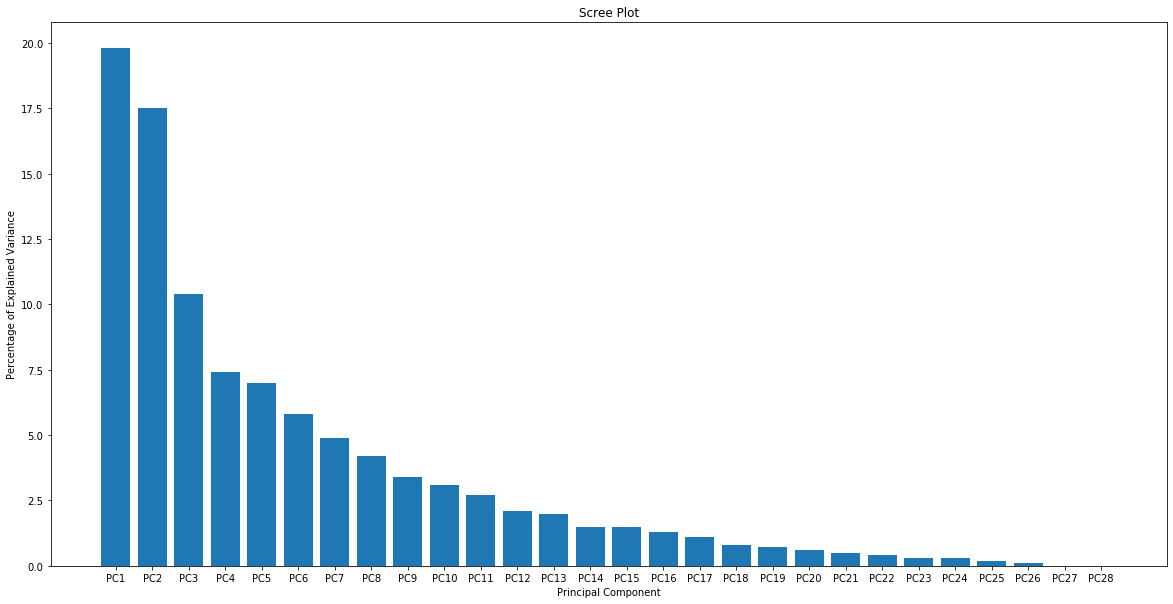

In [55]:
# First the risk factors dataframe will centered and scaled
scaled_data=preprocessing.scale(df_risk_factors_clustering)

#Create a PCA Object and fit Data
pca= PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

#Now calculate in percentage the influence in the variation per feature in order to reduce the compontents
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

#Create labels for the scree plot
labels= ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Plot the scree plot
plt.figure(figsize=[20,10])
plt.bar(x=range (1,len(per_var)+1),height=per_var, tick_label=labels)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

plt.show()


#### It can be seen that several Principal Components contribute to data variation between municipalities. Since the Principal Components represent the risk factors that might lead to depression, it is a good sign that there is enough variation between cities for most of features. Variation amongst municipalities is important for our final goal, which is to determine which cities have an increased risk factors that might lead to depression.  

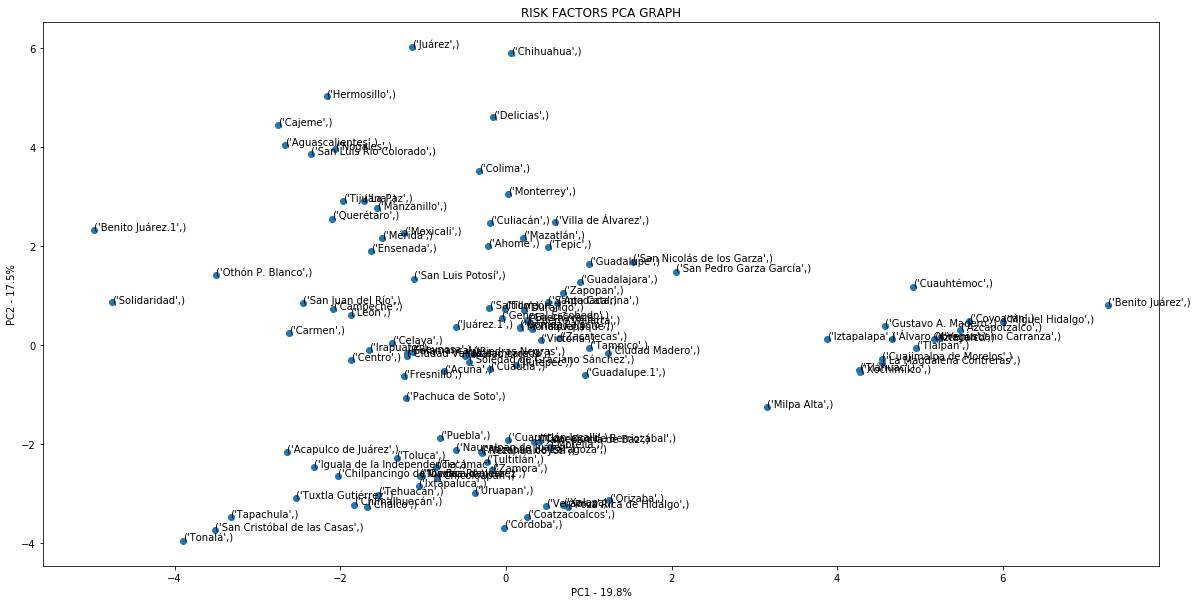

In [56]:
# Draw the PCA plot for the first 2 Components

Municipios=pd.read_csv('Municipalities_T.csv')

pca_df_risk_factors = pd.DataFrame(pca_data, index=[Municipios.columns], columns=labels)

plt.figure(figsize=[20,10])
plt.scatter(pca_df_risk_factors.PC1, pca_df_risk_factors.PC2)
plt.title('RISK FACTORS PCA GRAPH')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df_risk_factors.index:
    plt.annotate(sample,(pca_df_risk_factors.PC1.loc[sample],pca_df_risk_factors.PC2.loc[sample]))

plt.show()

#### From the graph, there is no cluster visible at first sight. However, it is still possible to check on the loading scores to determine which features (Principal Components) have more variation between municipalities. This step is a complement to the PCA Graph, but instead of calling  PC1,PC2, PCn... values will be related to the actual Feature Name.  

In [57]:
# Explore on the loading scores to determine which features had the greatest influence for separating the PCS clusters

loading_scores = pd.Series(pca.components_[0], index=[df_risk_factors_clustering.columns])
sorted_loading_scores = loading_scores.abs().sort_values(ascending =False)

print(sorted_loading_scores)



People migrating inside the State                                                                              0.345886
Total Mortality by breast cancer                                                                               0.314368
Percentage of population between 14-25 that has to go out from their region to go to school                    0.308475
Percentage of homes with internet access                                                                       0.282259
Total Mortality by Prostate Cancer                                                                             0.274671
Percentage of Retired Employees                                                                                0.271596
Total Population mortality by diabetes                                                                         0.255477
New Depression Cases (No per 100 thousand inhabitants)                                                         0.245227
Percentage of population between 14-25 w

#### Now that is is certain that there exist enough variation between municipalities for most features, it is possible to proceed to the next step, which is to calculate an "Estimated_Risk_Factor_Index" for every municipality. This Index will be calculated as the sum of every risk_factor per municipality. However, in the state data is, it is not possible to do that sum as factors have each a different scale. For example, values for some features are around 0.05 and some others on 150. If the sum of feature values were done as it is, some features with low values such as 0.05 will be underestimated in the INDEX. Hence, not all of the features would be equally represented in the Index. To solve this problem, we will take the sum of all values per feature and divide the municipality value for each feature and multiply the value by 100. By doing so, values for each feature will all be in the percent scale 0-100% making sure no feature is underestimated in the sum of the feature values. 

In [58]:
# Multiply every column value by 100 and divide by the sum of every column (Feature)
df_risk_factors_percentage=df_risk_factors_clustering.copy()
Columns=df_risk_factors_clustering.columns
for column in Columns:
    df_risk_factors_percentage[column]=(df_risk_factors_percentage[column]*100)/(df_risk_factors_percentage[column].sum())
df_risk_factors_percentage.head()

,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,3.630945,6.792870,0.859504,0.056621,0.800098,0.045316,0.814078,0.832740,0.561060,1.046162,0.558304,0.830271,0.477039,0.664606,0.776091,0.806332,0.599995,1.469425,0.177456,0.240174,0.909572,0.422414,0.0,0.0,0.237282,1.703522,0.506509,0.964645
1,1.049169,1.006220,0.890916,0.249533,0.783931,0.027391,0.866655,1.123640,1.814566,1.010816,0.585943,1.819533,0.254973,0.932509,0.824746,0.753136,0.714413,1.549989,2.510483,2.128849,1.020048,2.245856,0.0,0.0,1.145589,0.927654,1.013018,1.430964
2,1.988552,0.711976,1.052389,0.775246,0.866852,0.107648,0.947469,1.123640,1.814566,1.010816,0.585943,1.819533,0.254973,0.932509,0.824746,0.753136,0.714413,1.549989,2.510483,2.128849,1.020048,2.245856,0.0,0.0,1.145589,0.927654,1.013018,0.611549
3,3.436237,1.908249,0.572400,0.344037,0.804583,0.177941,0.992308,1.123640,1.814566,1.010816,0.585943,1.819533,0.254973,0.932509,0.824746,0.753136,0.714413,1.549989,2.510483,2.128849,1.020048,2.245856,0.0,0.0,1.145589,0.927654,1.013018,0.556594
4,2.435287,1.753955,1.218025,0.249215,0.896539,0.031432,0.981315,0.874253,0.781222,0.874968,0.585943,1.609831,0.211974,0.700670,0.680837,0.770685,0.517328,0.991749,0.455122,0.097774,0.900335,2.344265,0.0,0.0,1.635240,1.270587,0.205540,0.692520


In [59]:
# Now it is possible to calculate the index per municipality
df_risk_factors_percentage=pd.DataFrame(df_risk_factors_percentage.sum(axis=1))
df_risk_factors_percentage=df_risk_factors_percentage.rename(columns={0:'Estimated_Risk_Factor_Index'})
df_risk_factors_percentage.head()

,Estimated_Risk_Factor_Index
0,26.783031
1,28.680538
2,29.437441
3,31.168108
4,23.766613


#### Finally, it is time to cluster the different municipalities upon their Estimated Risk Factor Index using Kmeans

In [62]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_risk_factors_percentage)
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1], dtype=int32)

##### Let's add the cluster labels to the features dataframe

In [51]:
df_risk_factors_final=df_risk_factors.copy()
#df_risk_factors_final=df_risk_factors_final.drop('Cluster Labels', axis=1)
df_risk_factors_final.insert(4, 'Cluster Labels', kmeans.labels_)
df_risk_factors_final.insert(5, 'Estimated_Risk_Factor_Index', df_risk_factors_percentage)
df_risk_factors_final.head()

,State Index,State_x,Municipality Index,Municipality,Cluster Labels,Estimated_Risk_Factor_Index,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,1,Aguascalientes,1001,Aguascalientes,0,26.783031,0.322940,0.210253,9.300755,0.074254,46.159389,0.521931,42.075713,1316032,107.32,1.58,92.743566,20.2,17.710284,10.360994,12.9,0.005395,0.005243,0.060865,0.001444,0.000380,0.000684,0.231757,0.002584,0.0,0.0,0.001596,0.010638,20.7,0.883333
1,2,Baja California,2001,Ensenada,0,28.680538,0.093314,0.031145,9.640669,0.327242,45.226686,0.315474,44.793172,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,1.310345
2,2,Baja California,2002,Mexicali,0,29.437441,0.176864,0.022037,11.387984,1.016671,50.010614,1.239838,48.970065,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.560000
3,2,Baja California,2004,Tijuana,0,31.168108,0.305623,0.059064,6.193987,0.451176,46.418189,2.049438,51.287538,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.509677
4,3,Baja California Sur,3003,La Paz,0,23.766613,0.216597,0.054289,13.180345,0.326825,51.723325,0.362016,50.719377,718384,112.67,2.20,77.567012,21.2,34.338877,4.603944,13.6,0.004733,0.005011,0.052479,0.000974,0.000974,0.000278,0.229404,0.014338,0.0,0.0,0.010997,0.007934,8.4,0.634146


#### There are 3 labels, 0,1,2. From them it can be seen that Number 0 clusters municipalities with an Estimated Risk FActor Index below 20, Number 1 clusters municipalities with an Index between 20-30 and Number 2 clusters municipalities with an index above 30. It is then possible to assign a classification name to each cluster as follows: Number 0= Low Risk Factor. Number 1=Medium Risk Factor. Number 3= High Risk Factor. It will be added then another column, in which every municipality will be assigned a classification following their cluster number. 

In [64]:
classification=[]
for label in kmeans.labels_:
    if label==0:
        classification.append('Medium Risk Factor Index')
    elif label==1:
        classification.append('Low Risk Factor Index')
    elif label==2:
        classification.append('High Risk Factor Index')

df_risk_factors_final.insert(6, 'Classification', classification)
        

In [65]:
df_risk_factors_final.head()

,State Index,State_x,Municipality Index,Municipality,Cluster Labels,Estimated_Risk_Factor_Index,Classification,Number of Deaths by Natural Cause,Number of Divorces,Percentage of Retired Employees,Percentage of homes lacking a proper roof,Percentage of population between 14-25 with access to school,Percentage of population between 14-25 that has to go out from their region to go to school,Percentage of homes with internet access,Total Population in the State,New Depression Cases (No per 100 thousand inhabitants),New Anorexia & Bulimia Cases (No per 100 thousand inhabitants),People with Water access at home,Percentage of population who has felt depressed,People migrating out of the State,People migrating inside the State,People without social security,Total Mortality by breast cancer,Total Mortality by Prostate Cancer,Total Population mortality by diabetes,People admitted for breach of trust to state prisons,People admitted sexual abuse to state prisons,People declared being Discriminated,Number of Workplace Conflicts legally registered,Persons admitted for breach of obligations of family assistance to state prisons,People admitted for other crimes against the family to state prisons,People admitted gender-based violence in all its different modalities to domestic violence to state prisons,Persons admitted for family violence to state prisons,Number of Deaths by suicide,Deaths of mothers giving birth (Rate for 100 000 newborns),Number of Bars and Nightclubs per Number of Leisure and Recreation venues
0,1,Aguascalientes,1001,Aguascalientes,0,26.783031,Medium Risk Factor Index,0.322940,0.210253,9.300755,0.074254,46.159389,0.521931,42.075713,1316032,107.32,1.58,92.743566,20.2,17.710284,10.360994,12.9,0.005395,0.005243,0.060865,0.001444,0.000380,0.000684,0.231757,0.002584,0.0,0.0,0.001596,0.010638,20.7,0.883333
1,2,Baja California,2001,Ensenada,0,28.680538,Medium Risk Factor Index,0.093314,0.031145,9.640669,0.327242,45.226686,0.315474,44.793172,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,1.310345
2,2,Baja California,2002,Mexicali,0,29.437441,Medium Risk Factor Index,0.176864,0.022037,11.387984,1.016671,50.010614,1.239838,48.970065,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.560000
3,2,Baja California,2004,Tijuana,0,31.168108,Medium Risk Factor Index,0.305623,0.059064,6.193987,0.451176,46.418189,2.049438,51.287538,3348898,144.81,5.11,89.610075,21.2,38.811961,5.537852,18.1,0.005733,0.004897,0.072472,0.001523,0.005375,0.006062,0.259906,0.013736,0.0,0.0,0.007704,0.005793,41.4,0.509677
4,3,Baja California Sur,3003,La Paz,0,23.766613,Medium Risk Factor Index,0.216597,0.054289,13.180345,0.326825,51.723325,0.362016,50.719377,718384,112.67,2.20,77.567012,21.2,34.338877,4.603944,13.6,0.004733,0.005011,0.052479,0.000974,0.000974,0.000278,0.229404,0.014338,0.0,0.0,0.010997,0.007934,8.4,0.634146


#### Finally, create a map of the clusters centered in Mexico (Country)

In [67]:
# create map of the clusters centered in Mexico (country)

map_clusters = folium.Map(location=[23.6345005, -102.5527878], zoom_start=5)

# set color scheme for the clusters
rainbow = ['orange','green','red']


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,classification in zip(df_risk_factors_B['Latitude'], df_risk_factors_B['Longitude'], df_risk_factors_B['Municipality'], df_risk_factors_final['Cluster Labels'],df_risk_factors_final['Classification']):
    label = folium.Popup(str(poi) + ', Cluster: ' + str(cluster)+', ' +str(classification), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)

    
map_clusters

In [69]:
map_clusters.save('index.html')